# Carotid ultrasound dataset  

### Description 

Carotid intima–media thickness computed from carotid ultrasound imaging.

### Introduction

Carotid intima-media thickness (CIMT) measurement is an ultrasound-based technique used to assess the thickness of the innermost two layers of the carotid artery, known as the intima and media. These layers can become thickened due to atherosclerotic processes or due to age. The thickening of the intima-media layer can be throughout the length of the artery (increased IMT) or as local accumulation of fatty deposits that penetrate into the vessel interior known  as plaques. Advanced plaques can cause stenosis of the artery. Carotid IMT is increasingly used as an indicator of early atherosclerosis and a predictor for cardiovascular events and can be used for identifying asymptomatic patients at high risk who might be candidates for more intensive medical interventions. Measurement of CIMT with B-mode ultrasound is a noninvasive, sensitive, and reproducible technique for identifying and quantifying subclinical vascular disease and for evaluating CVD risk.

The ultrasound probe is placed on the skin over the carotid artery and high-frequency sound waves are used to produce images of the artery. These images are then analyzed using an automatic detection algorithm to measure the thickness of the intima and media layers. 

### Measurement protocol 
<!-- long measurment protocol for the data browser -->
Carotid US was performed using the Supersonic Aixplorer MACH 30 (Hologic, USA). Carotid Intima Media (CIMT) was measured using the L10-2 transducer from both carotid arteries while the subject in supine position with head rotated to the opposite side of the measured artery. Evaluation was performed using an automatic computerized system (Aixplorer Mach 30). The intima and media are automatically traced within the box of interest. Mean CIMT was recorded over a length of 1 cm at the far wall of each carotid artery. One measurement was obtained from each carotid artery. Only parts of the carotid artery without plaques were included in the IMT analysis.

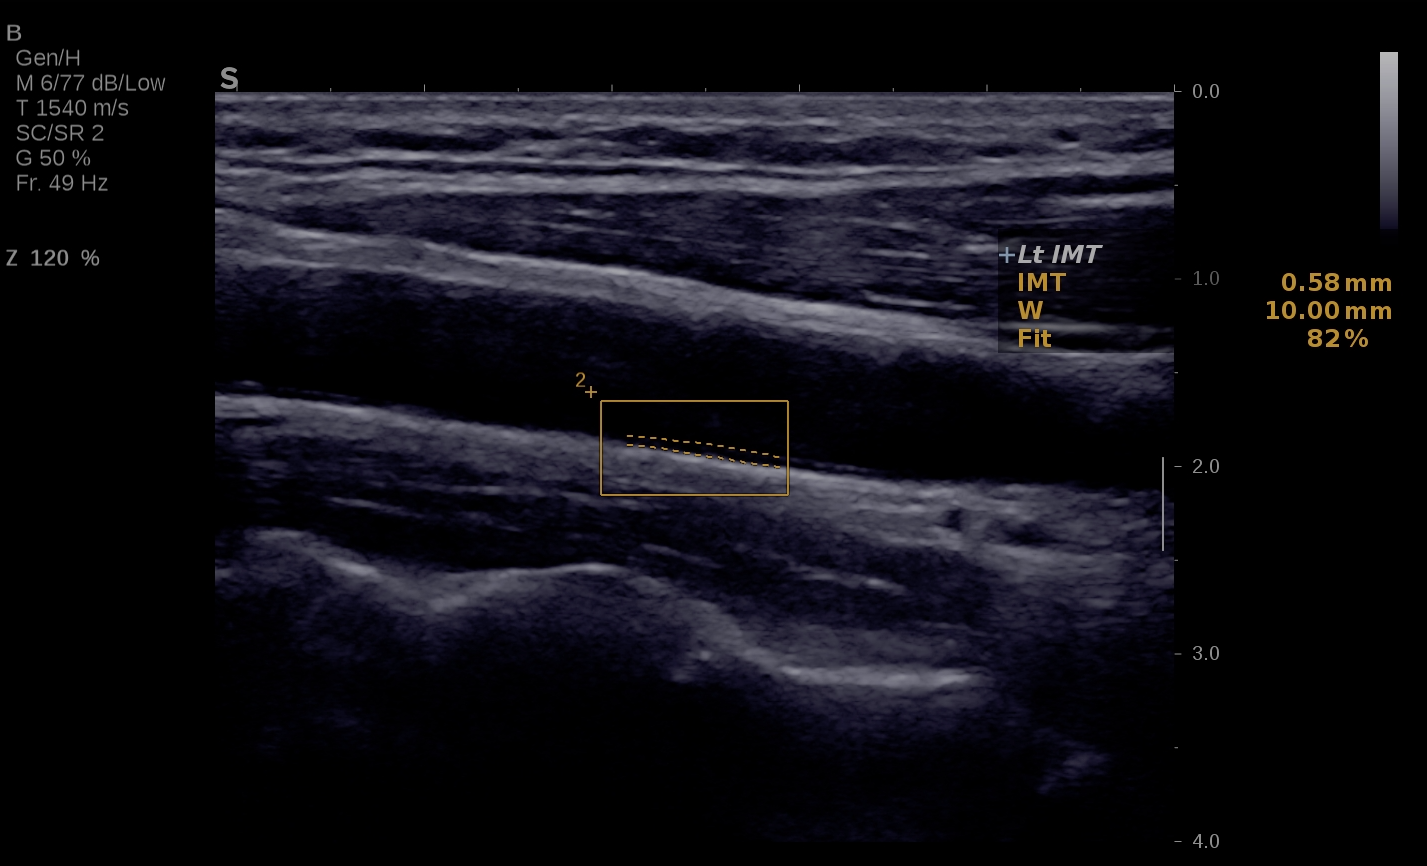

### Data availability 
<!-- for the example notebooks -->
The information is stored in 1 parquet file: `carotid_ultrasound.parquet`

### Relevant links

* [Pheno Knowledgebase](https://knowledgebase.pheno.ai/datasets/012-carotid_ultrasound.html)
* [Pheno Data Browser](https://pheno-demo-app.vercel.app/folder/12)

In [1]:
%load_ext autoreload
%autoreload 2

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from pheno_utils import PhenoLoader

In [2]:
pl = PhenoLoader('carotid_ultrasound', base_path='s3://pheno-synthetic-data/data')
pl

PhenoLoader for carotid_ultrasound with
11 fields
2 tables: ['carotid_ultrasound', 'age_sex']

# Data dictionary
For some datasets, we can also take a look at the data dictionary

In [ ]:
pl.dict.head()

,field_string,description_string,folder_id,feature_set,field_type,strata,data_coding,array,pandas_dtype,bulk_file_extension,relative_location,units,bulk_dictionary,sampling_rate,transformation,list_of_tags,stability,sexed,debut,completed
tabular_field_name,,,,,,,,,,,,,,,,,,,,
timezone,Timezone,Timezone at collection,12,carotid_ultrasound,Categorical (single),Collection time,001_03,Single,category,NaN,carotid_ultrasound/carotid_ultrasound.parquet,NaN,NaN,NaN,NaN,NaN,Accruing,Both sexes,2021-08-16,NaN
collection_date,Collection date (YYYY-MM-DD),Collection date (YYYY-MM-DD),12,carotid_ultrasound,Date,Collection time,NaN,Single,datetime64[ns],NaN,carotid_ultrasound/carotid_ultrasound.parquet,NaN,NaN,NaN,NaN,NaN,Accruing,Both sexes,2021-08-16,NaN
collection_timestamp,Collection timestamp,Collection timestamp,12,carotid_ultrasound,Datetime,Collection time,NaN,Single,"datetime64[ns, Asia/Jerusalem]",NaN,carotid_ultrasound/carotid_ultrasound.parquet,NaN,NaN,NaN,NaN,NaN,Accruing,Both sexes,2021-08-16,NaN
imt_left,Intima media thickness (left),Intima Media Thickness (IMT) measurement is an...,12,carotid_ultrasound,Continuous,Primary,NaN,Single,float,NaN,carotid_ultrasound/carotid_ultrasound.parquet,mm,NaN,NaN,NaN,NaN,Accruing,Both sexes,2021-08-16,NaN
imt_right,Intima media thickness (right),Intima Media Thickness (IMT) measurement is an...,12,carotid_ultrasound,Continuous,Primary,NaN,Single,float,NaN,carotid_ultrasound/carotid_ultrasound.parquet,mm,NaN,NaN,NaN,NaN,Accruing,Both sexes,2021-08-16,NaN


In [ ]:
# Show all fields
pl[pl.fields]

,,,,collection_date,collection_timestamp,imt_fit_left,imt_fit_right,imt_left,imt_right,imt_window_width_left,imt_window_width_right,timezone,age,sex
participant_id,cohort,research_stage,array_index,,,,,,,,,,,
5516424321,10k,00_00_visit,0,2022-08-18 12:26:09.583478784,2022-08-12 00:18:54.426792704,99.249682,98.298542,0.474094,0.446852,NaN,10.0,asia/jerusalem,54.447672,Female
5027574288,10k,00_00_visit,0,2021-07-03 18:50:41.345769472,2021-08-05 09:15:22.501833216,94.293096,62.031624,0.530276,NaN,10.0,10.0,asia/jerusalem,54.169913,Male
7783260382,10k,00_00_visit,0,2022-09-01 02:46:32.780180992,2022-09-26 17:12:49.366078976,97.191598,96.726760,0.649342,0.648053,10.0,10.0,asia/jerusalem,45.892093,Male
1178277844,10k,00_00_visit,0,2020-10-28 04:06:09.392275968,2020-11-08 09:08:18.456362752,88.799935,94.087222,0.550836,0.532716,10.0,10.0,asia/jerusalem,44.435100,Female
1622660825,10k,00_00_visit,0,2020-09-29 14:40:27.218767616,2020-10-18 13:42:17.497976576,99.076009,85.424161,0.480795,0.512995,10.0,10.0,asia/jerusalem,44.621536,Male
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9642255339,10k,02_01_visit,0,2022-02-06 19:26:47.933052672,2022-02-08 02:21:44.143605504,76.569740,70.519453,0.559032,0.586198,10.0,10.0,asia/jerusalem,61.462461,Male
9668685572,10k,02_01_visit,0,2020-10-26 21:34:03.624926720,2020-11-29 21:26:31.474996992,89.751986,99.400000,0.569895,0.539883,10.0,10.0,asia/jerusalem,55.199891,Female
9704705313,10k,02_01_visit,0,2022-01-30 07:15:19.987816192,2022-01-10 19:02:00.165125888,99.400000,85.016924,0.475081,0.435432,10.0,10.0,asia/jerusalem,42.207211,Male


In [ ]:
pl['imt_left', 'imt_window_width_left', 'imt_fit_left'].head()

,,,,imt_left,imt_window_width_left,imt_fit_left
participant_id,cohort,research_stage,array_index,,,
5516424321,10k,00_00_visit,0,0.474094,NaN,99.249682
5027574288,10k,00_00_visit,0,0.530276,10.0,94.293096
7783260382,10k,00_00_visit,0,0.649342,10.0,97.191598
1178277844,10k,00_00_visit,0,0.550836,10.0,88.799935
1622660825,10k,00_00_visit,0,0.480795,10.0,99.076009


# Plot histogram and ecdf for imt_left at baseline visit


In [6]:
from pheno_utils.basic_plots import hist_ecdf_plots

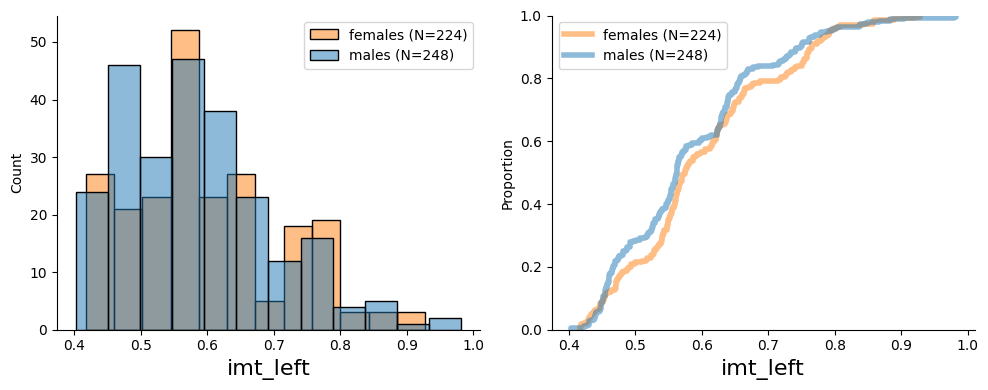

,count,mean,std,min,25%,50%,75%,max
imt_left,472.0,0.59101,0.114069,0.40294,0.500681,0.565227,0.652795,0.981436


In [7]:
col = "imt_left"
df = pl[[col] + ["age", "sex", "collection_date"]].loc[:,:,"00_00_visit",0,:]

# plot histogram and ecdf
hist_ecdf_plots(df.dropna(subset=[col,"sex", "age"]), col, gender_col="sex")

# stats
display(df[col].describe().to_frame().T)

# Age / sex reference plots

In [8]:
from pheno_utils.age_reference_plots import GenderAgeRefPlot

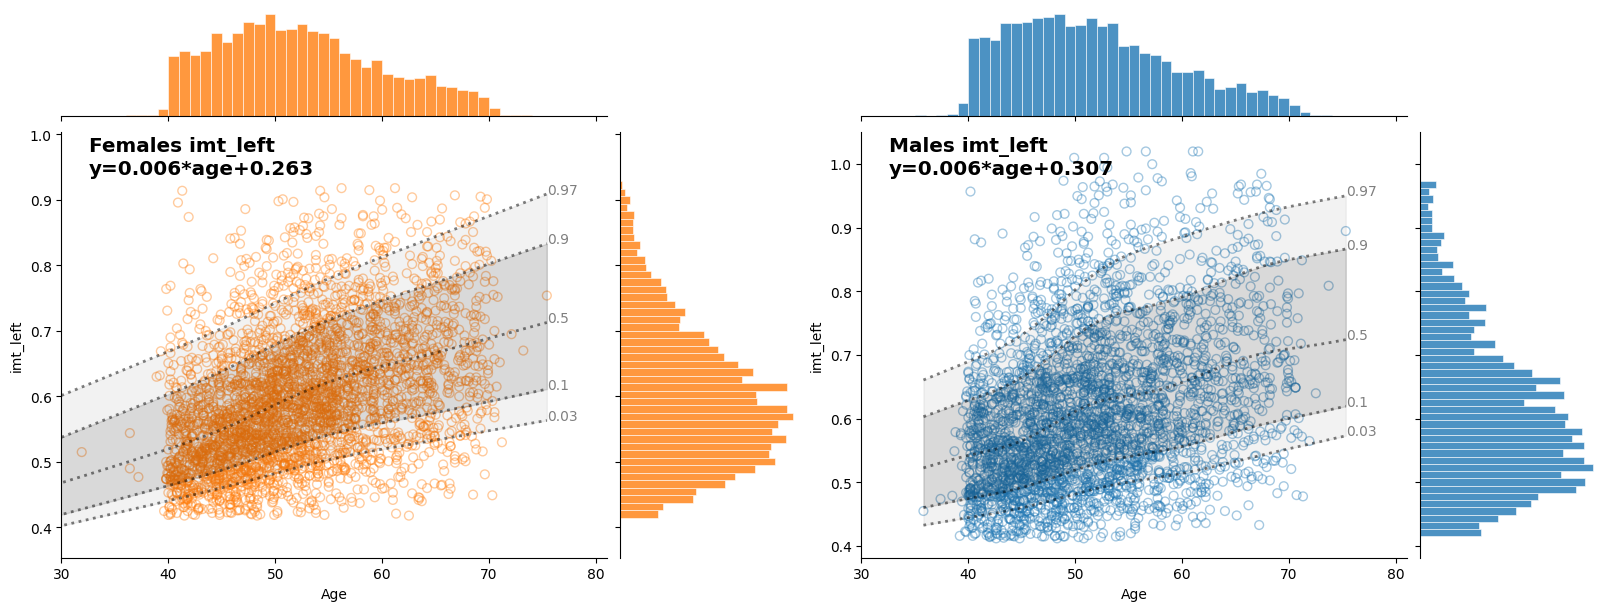

In [9]:
gender_refplots = GenderAgeRefPlot(df.dropna(subset=[col,"sex", "age"]), "imt_left", age_col="age")
gender_refplots.plot()

# Bland-Altman plots for left and right IMT

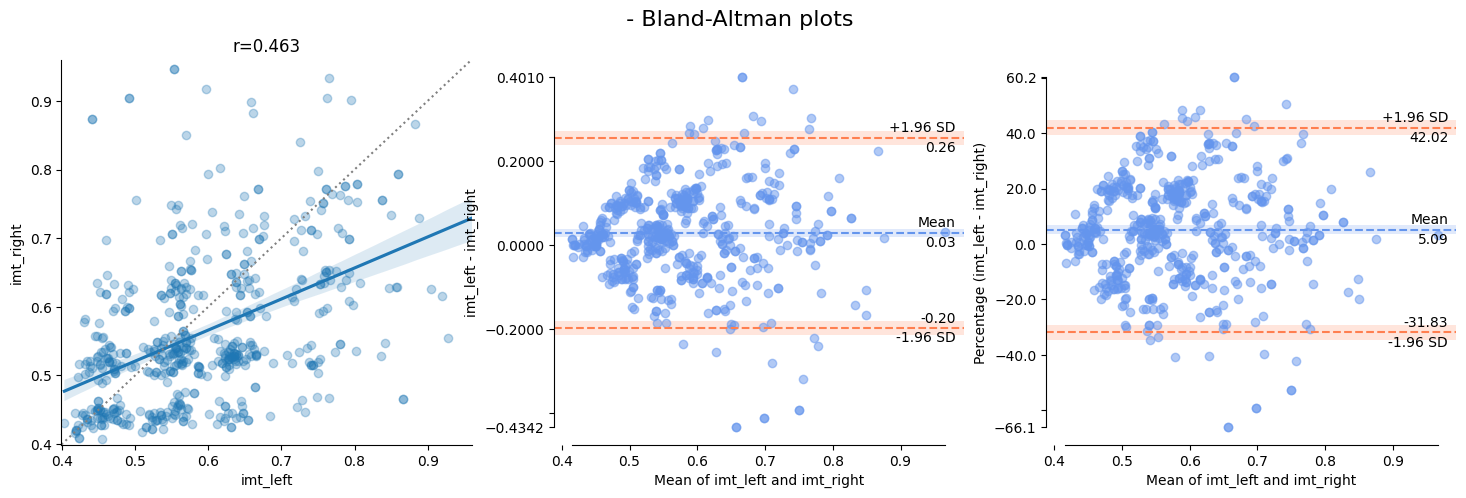

In [8]:
from pheno_utils.blandaltman_plots import bland_altman_triple_plot

bland_altman_triple_plot(pl[['imt_left', 'imt_right']], 'imt_left', 'imt_right')